In [2]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import pandas as pd
import os
import anndata as ad
import scipy as sp

In [3]:
adata = sc.read_h5ad('../../results/02_nc_2021_Tabib/scrna.integrated.annotated.h5ad')

In [4]:
adata1 = adata[adata.obs['leiden'] == "8", :]
adata2 = adata[adata.obs['leiden'] != "8", :]

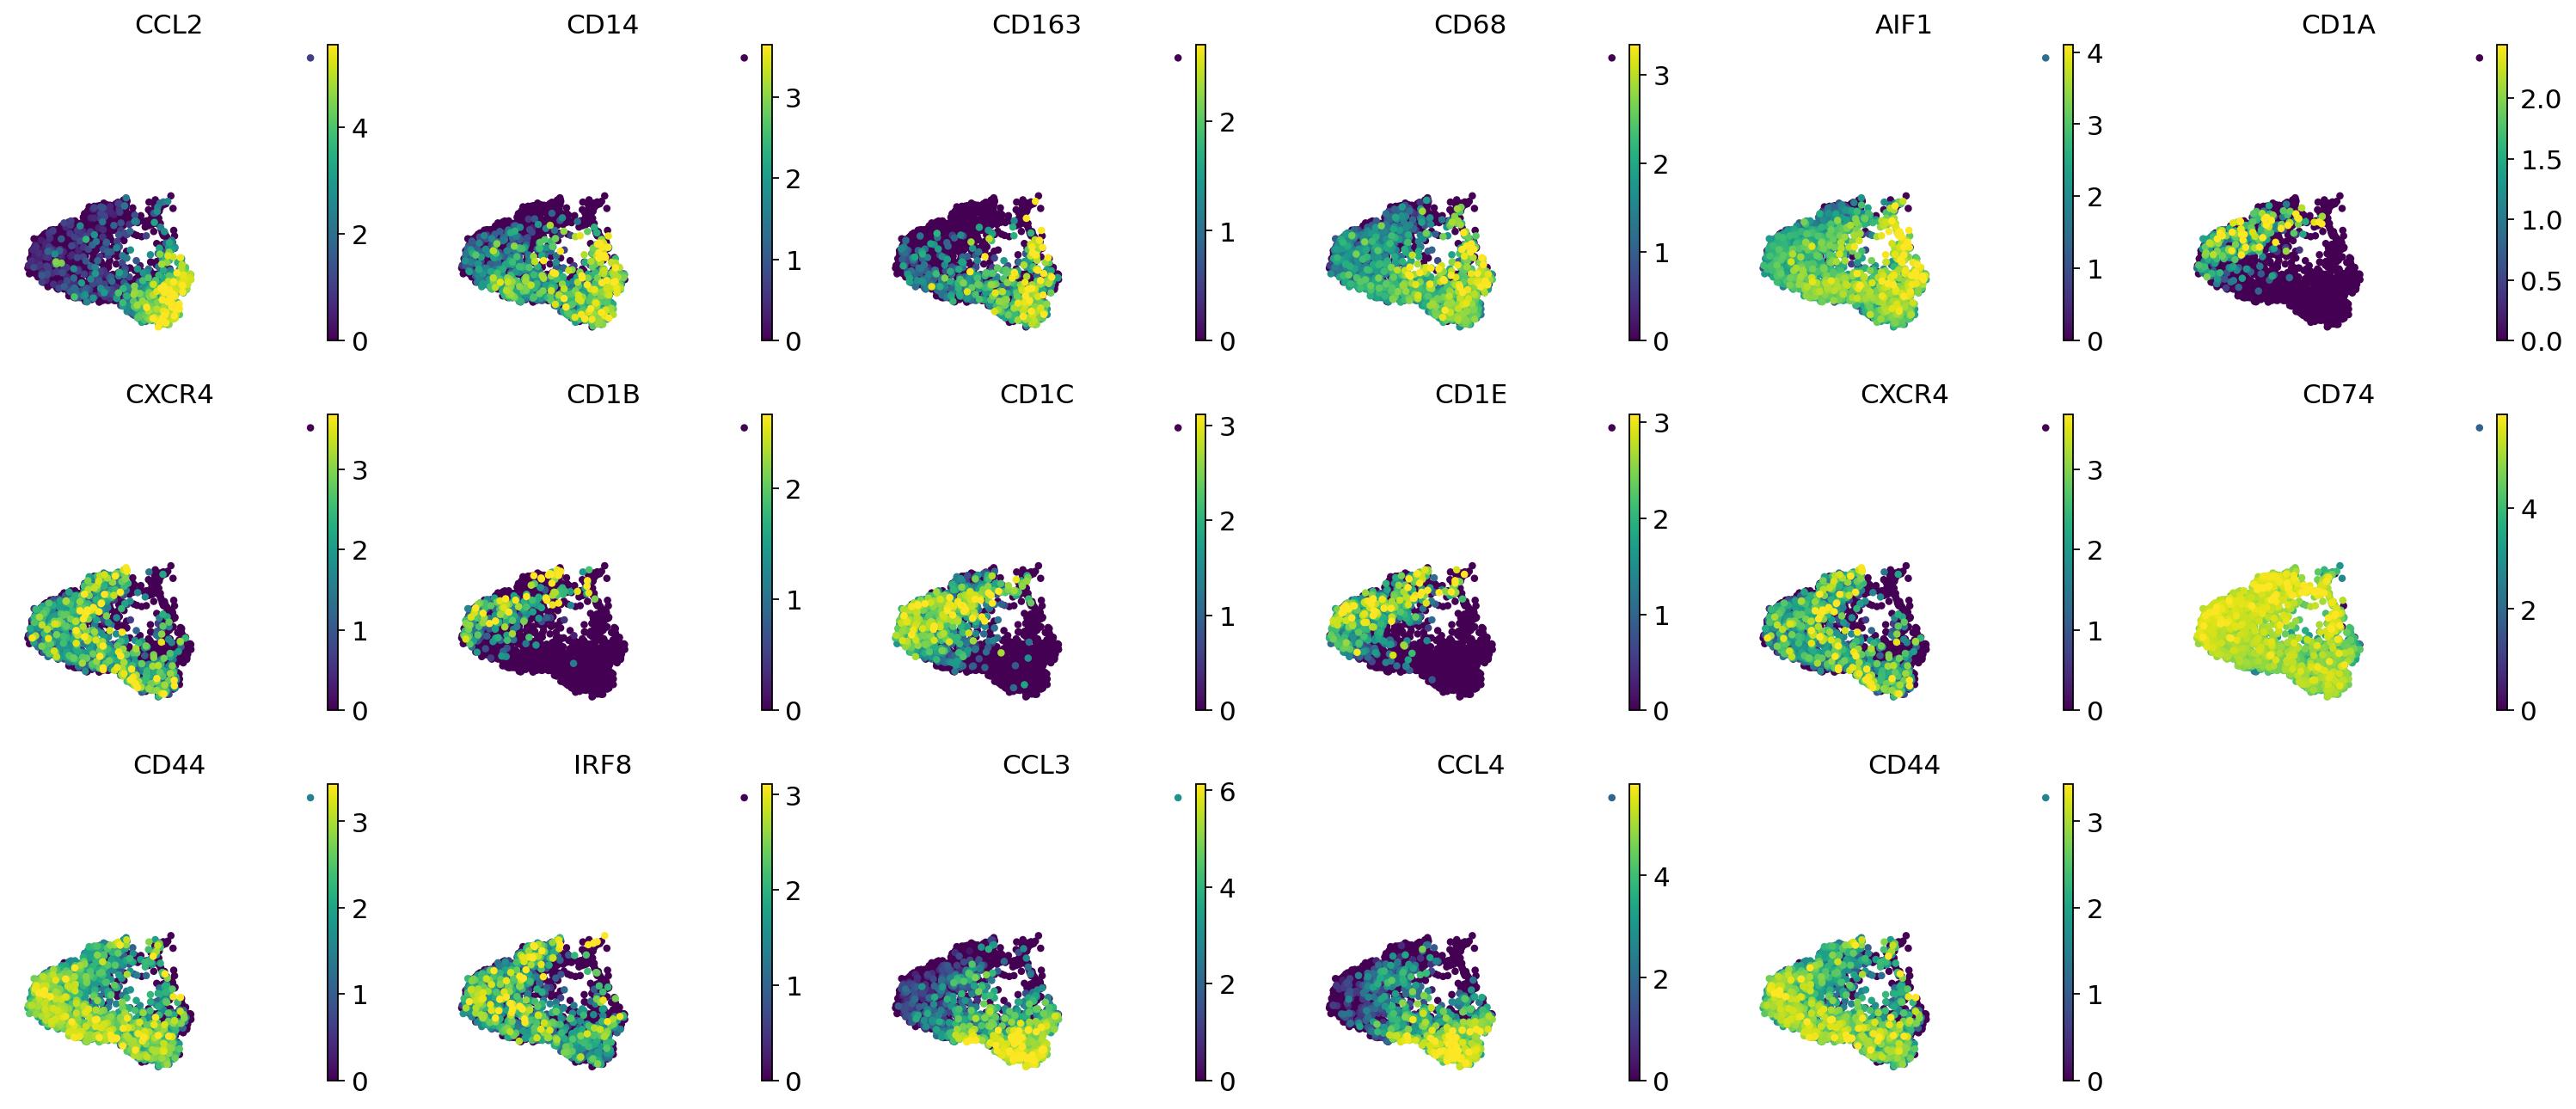

In [5]:
sc.set_figure_params(figsize=(3, 3))

sc.pl.umap(adata1, color=['CCL2', 'CD14', 'CD163', 'CD68', 'AIF1', 'CD1A', 'CXCR4', 'CD1B', 'CD1C',
                      'CD1E', 'CXCR4', 'CD74', 'CD44', 'IRF8', 'CCL3', 'CCL4', 'CD44'], legend_loc='on data', 
           frameon=False, ncols=6, vmax='p99')

In [6]:
# we re-cluster macrophages
sc.tl.leiden(adata1, resolution=0.1, key_added="leiden_0.1")

In [7]:
# find marker genes
adata1.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(adata1, 'leiden_0.1', method='wilcoxon')

result = adata1.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names']}).head(20)

df

,0_n,1_n
0,LYZ,RNASE1
1,FCER1A,C1QA
2,G0S2,SELENOP
3,HLA-DQB1,CCL2
4,CYTIP,FTL
5,COTL1,FOLR2
6,HLA-DPB1,C1QB
7,CD1C,CCL13
8,CLEC10A,CCL3
9,LGALS2,MS4A4A


In [8]:
adata1.obs['cell_type'] = adata1.obs['leiden_0.1']

In [9]:
adata1.obs['cell_type'] = adata1.obs['cell_type'].str.replace(r'\b0\b', 'cDC', regex=True)
adata1.obs['cell_type'] = adata1.obs['cell_type'].str.replace(r'\b1\b', 'Macrophages', regex=True)

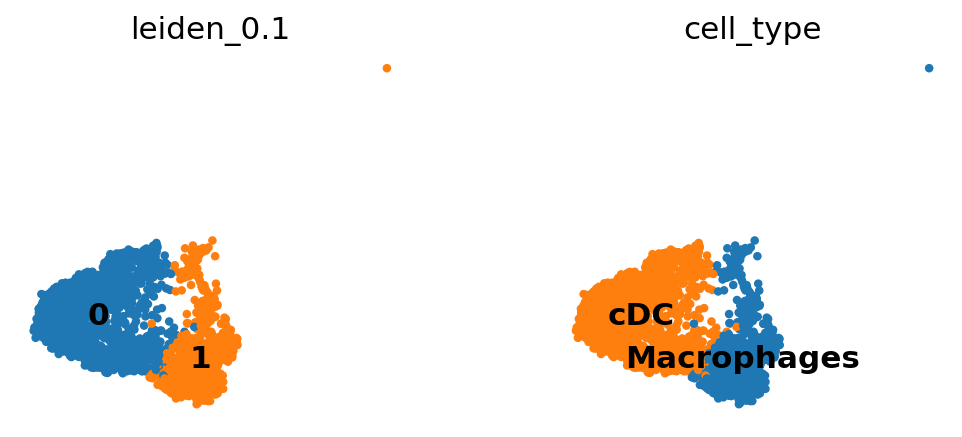

In [11]:
sc.pl.umap(adata1, color=['leiden_0.1', 'cell_type'], legend_loc='on data', frameon=False)

In [12]:
adata1.obs.drop('leiden_0.1', axis=1, inplace=True)

In [13]:
adata1.obs

,n_genes,sample,condition,batch,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cell_type
AACGTCGACTGGAT-1_0,1619,GSM4115868,CONTROL,0,7942.0,1619,7942.0,35.0,0.440695,8,cDC
AACTTGCTACACGT-1_0,1166,GSM4115868,CONTROL,0,6502.0,1166,6502.0,3.0,0.046140,8,cDC
AAGAACGAATTCGG-1_0,693,GSM4115868,CONTROL,0,2654.0,693,2654.0,66.0,2.486812,8,Macrophages
AATATCGACCTATT-1_0,1589,GSM4115868,CONTROL,0,9930.0,1589,9930.0,46.0,0.463243,8,cDC
AATTGATGGGAGCA-1_0,807,GSM4115868,CONTROL,0,2984.0,807,2984.0,37.0,1.239946,8,Macrophages
...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGGAGCCGATTT-1_21,1609,GSM4115889,SSC,21,6395.0,1609,6395.0,225.0,3.518374,8,cDC
TTTACTGGTACGACCC-1_21,1530,GSM4115889,SSC,21,5141.0,1530,5141.0,181.0,3.520716,8,Macrophages
TTTACTGTCTTATCTG-1_21,2141,GSM4115889,SSC,21,8274.0,2141,8274.0,225.0,2.719362,8,cDC
TTTCCTCCATTGTGCA-1_21,706,GSM4115889,SSC,21,1822.0,706,1822.0,53.0,2.908891,8,cDC


In [14]:
adata = ad.concat([adata1, adata2])

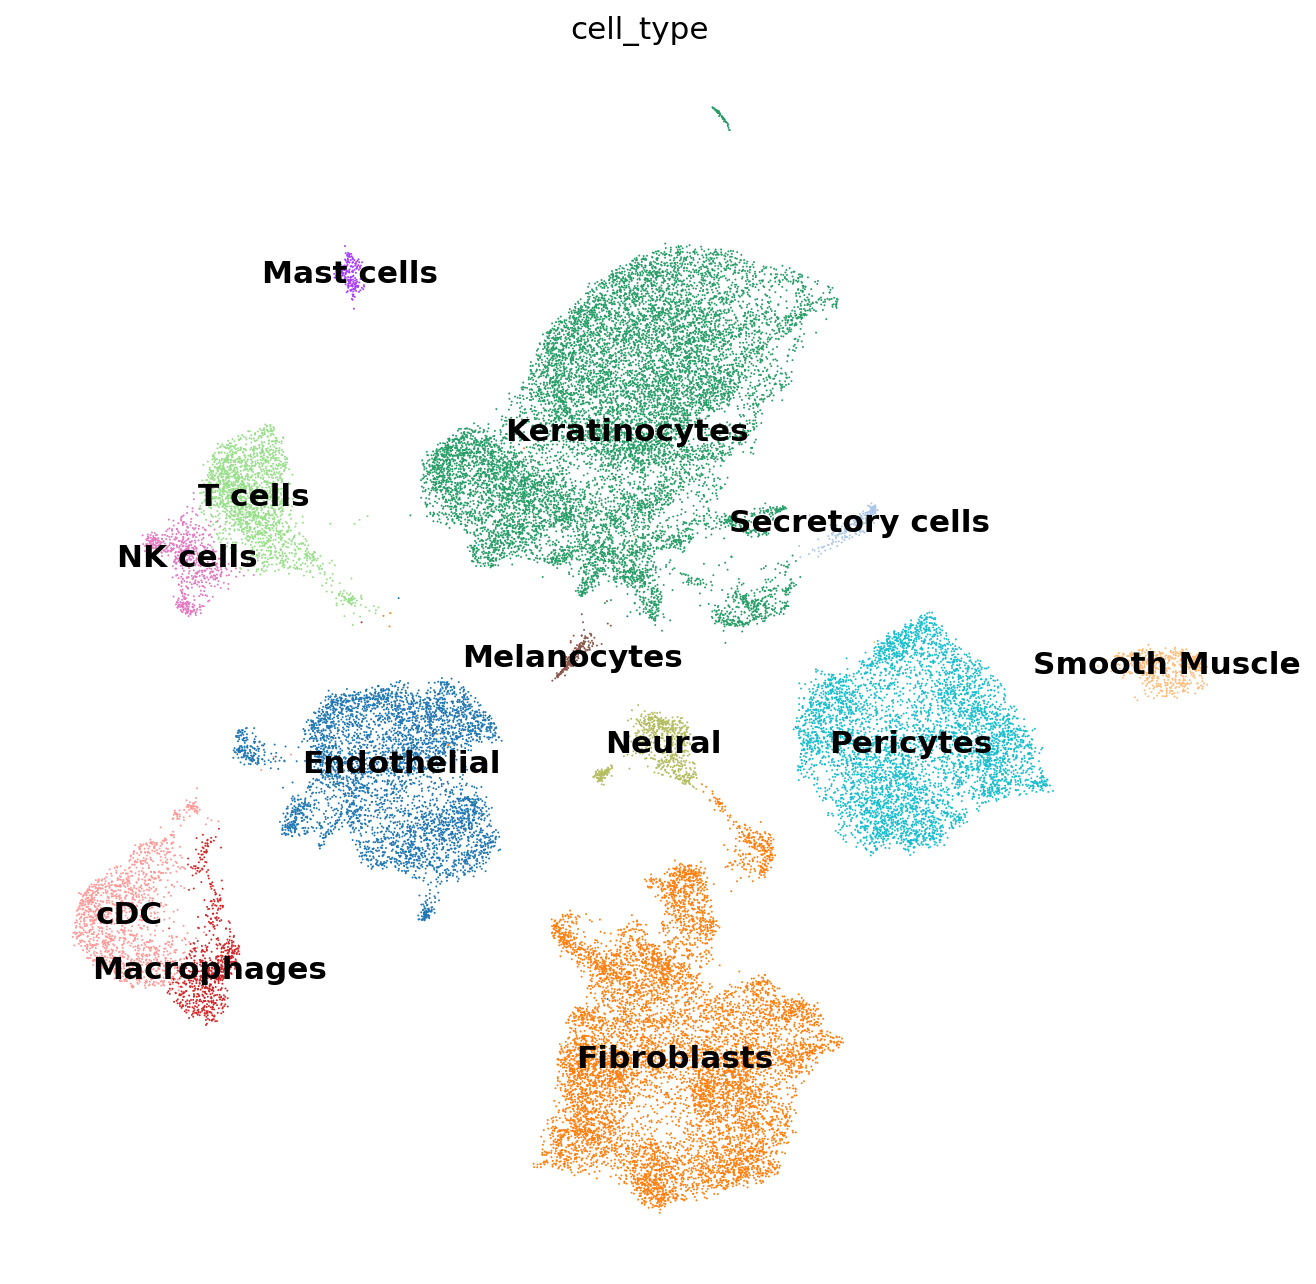

In [15]:
sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(adata, color=['cell_type'], legend_loc='on data', frameon=False)

In [17]:
adata.write_h5ad('../../results/02_nc_2021_Tabib/scrna.integrated.annotated.v2.h5ad')